**1. Importing the dependencies**

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

**2. Data Loading & Understanding**

In [81]:
# converting arff data to csv
file_path = "Autism_Data.arff"
df = pd.read_csv(file_path, comment='@') 
df.to_csv("Autism_Data.csv", index=False)

Initial Inspection

In [82]:
df.shape

(704, 21)

In [83]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,?,no,no,Egypt,no,2,'18 and more',?,NO


In [84]:
df.tail()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
699,0,1,0,1,1,0,1,1,1,1,25,f,White-European,no,no,Russia,no,7,'18 and more',Self,YES
700,1,0,0,0,0,0,0,1,0,1,34,m,Hispanic,no,no,Mexico,no,3,'18 and more',Parent,NO
701,1,0,1,1,1,0,1,1,0,1,24,f,?,no,no,Russia,no,7,'18 and more',?,YES
702,1,0,0,1,1,0,1,0,1,1,35,m,'South Asian',no,no,Pakistan,no,6,'18 and more',Self,NO
703,1,0,1,1,1,0,1,1,1,1,26,f,White-European,no,no,Cyprus,no,8,'18 and more',Self,YES


In [85]:
# display all columns of a dataframe
pd.set_option('display.max_columns', None)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         704 non-null    int64 
 1   A2_Score         704 non-null    int64 
 2   A3_Score         704 non-null    int64 
 3   A4_Score         704 non-null    int64 
 4   A5_Score         704 non-null    int64 
 5   A6_Score         704 non-null    int64 
 6   A7_Score         704 non-null    int64 
 7   A8_Score         704 non-null    int64 
 8   A9_Score         704 non-null    int64 
 9   A10_Score        704 non-null    int64 
 10  age              704 non-null    object
 11  gender           704 non-null    object
 12  ethnicity        704 non-null    object
 13  jundice          704 non-null    object
 14  austim           704 non-null    object
 15  contry_of_res    704 non-null    object
 16  used_app_before  704 non-null    object
 17  result           704 non-null    in

In [87]:
# convert age column datatype to integer
df["age"] = df["age"].replace("?", pd.NA).astype("Int64")  

In [88]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO


In [89]:
for col in df.columns:
  numerical_features = ["ID", "age", "result"]
  if col not in numerical_features:
    print(col, df[col].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [1 0]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [1 0]
--------------------------------------------------
A5_Score [0 1]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [1 0]
--------------------------------------------------
A9_Score [0 1]
--------------------------------------------------
A10_Score [0 1]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['White-European' 'Latino' '?' 'Others' 'Black' 'Asian'
 "'Middle Eastern '" 'Pasifika' "'South Asian'" 'Hispanic' 'Turkish'
 'others']
--------------------------------------------------
jundice ['no' 'yes']
--------------------------------------------------
au

In [90]:
# dropping age_desc column
df = df.drop(columns=["age_desc"])

In [91]:
df.shape

(704, 20)

In [92]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,'United States',no,6,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,Self,NO


In [93]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [94]:
df["contry_of_res"].unique()

array(["'United States'", 'Brazil', 'Spain', 'Egypt', "'New Zealand'",
       'Bahamas', 'Burundi', 'Austria', 'Argentina', 'Jordan', 'Ireland',
       "'United Arab Emirates'", 'Afghanistan', 'Lebanon',
       "'United Kingdom'", "'South Africa'", 'Italy', 'Pakistan',
       'Bangladesh', 'Chile', 'France', 'China', 'Australia', 'Canada',
       "'Saudi Arabia'", 'Netherlands', 'Romania', 'Sweden', 'Tonga',
       'Oman', 'India', 'Philippines', "'Sri Lanka'", "'Sierra Leone'",
       'Ethiopia', "'Viet Nam'", 'Iran', "'Costa Rica'", 'Germany',
       'Mexico', 'Russia', 'Armenia', 'Iceland', 'Nicaragua',
       "'Hong Kong'", 'Japan', 'Ukraine', 'Kazakhstan', 'AmericanSamoa',
       'Uruguay', 'Serbia', 'Portugal', 'Malaysia', 'Ecuador', 'Niger',
       'Belgium', 'Bolivia', 'Aruba', 'Finland', 'Turkey', 'Nepal',
       'Indonesia', 'Angola', 'Azerbaijan', 'Iraq', "'Czech Republic'",
       'Cyprus'], dtype=object)

In [95]:
# define the mapping dictionary for country names
mapping = {
    "Viet Nam": "Vietnam",
    "AmericanSamoa": "United States",
    "Hong Kong": "China"
}

# repalce value in the country column
df["contry_of_res"] = df["contry_of_res"].replace(mapping)

In [96]:
df["contry_of_res"].unique()

array(["'United States'", 'Brazil', 'Spain', 'Egypt', "'New Zealand'",
       'Bahamas', 'Burundi', 'Austria', 'Argentina', 'Jordan', 'Ireland',
       "'United Arab Emirates'", 'Afghanistan', 'Lebanon',
       "'United Kingdom'", "'South Africa'", 'Italy', 'Pakistan',
       'Bangladesh', 'Chile', 'France', 'China', 'Australia', 'Canada',
       "'Saudi Arabia'", 'Netherlands', 'Romania', 'Sweden', 'Tonga',
       'Oman', 'India', 'Philippines', "'Sri Lanka'", "'Sierra Leone'",
       'Ethiopia', "'Viet Nam'", 'Iran', "'Costa Rica'", 'Germany',
       'Mexico', 'Russia', 'Armenia', 'Iceland', 'Nicaragua',
       "'Hong Kong'", 'Japan', 'Ukraine', 'Kazakhstan', 'United States',
       'Uruguay', 'Serbia', 'Portugal', 'Malaysia', 'Ecuador', 'Niger',
       'Belgium', 'Bolivia', 'Aruba', 'Finland', 'Turkey', 'Nepal',
       'Indonesia', 'Angola', 'Azerbaijan', 'Iraq', "'Czech Republic'",
       'Cyprus'], dtype=object)

In [97]:
# taget class distribution
df["Class/ASD"].value_counts()

Class/ASD
NO     515
YES    189
Name: count, dtype: int64

**3. Exploratory Data Analysis (EDA)**

In [98]:
df.shape

(704, 20)

In [99]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [100]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,'United States',no,6,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,Self,NO


In [101]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.0,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.0,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.0,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.0,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.0,10.000000


**Univariate Analysis**

Numerical Columns:
- age
- result

In [102]:
sns.set_theme(style="darkgrid")

Distribution Plots

Mean: 29.698005698005698
Median: 27.0


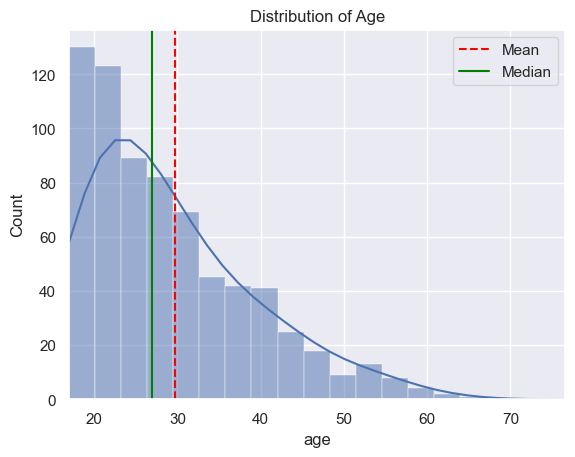

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram
sns.histplot(df["age"], kde=True)
plt.title("Distribution of Age")

# Calculate mean and median
age_mean = df["age"].mean()
age_median = df["age"].median()

print("Mean:", age_mean)
print("Median:", age_median)

# Add vertical lines for mean and median
plt.axvline(age_mean, color="red", linestyle="--", label="Mean")
plt.axvline(age_median, color="green", linestyle="-", label="Median")
plt.legend()

# Set x-axis limits (adjust the range as needed)
plt.xlim(df["age"].min(), df["age"].max() * 0.2)  

plt.show()


Mean: 4.875
Median: 4.0


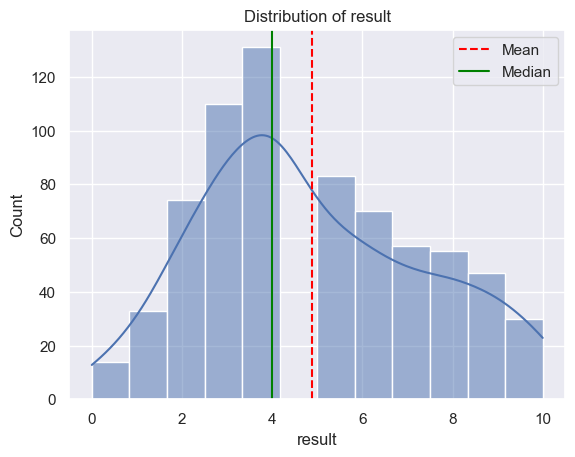

In [104]:
# Histogram for "result"

sns.histplot(df["result"], kde=True)
plt.title("Distribution of result")

# calculate mean and median
result_mean = df["result"].mean()
result_median = df["result"].median()

print("Mean:", result_mean)
print("Median:", result_median)


# add vertical lines for mean and median
plt.axvline(result_mean, color="red", linestyle="--", label="Mean")
plt.axvline(result_median, color="green", linestyle="-", label="Median")

plt.legend()

plt.show()

**Box plots for identifying outliers in the numerical columns**

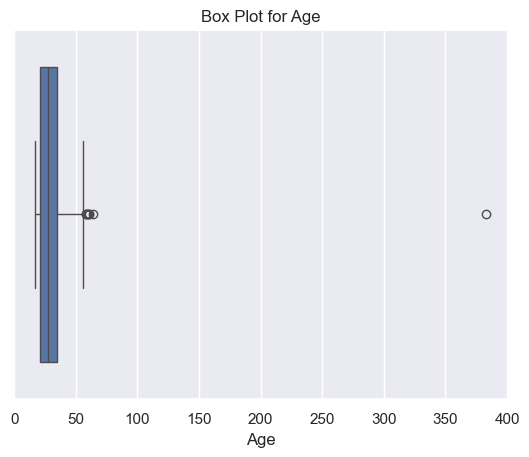

In [105]:
# box plot
sns.boxplot(x=df["age"])
plt.title("Box Plot for Age")
plt.xlabel("Age")
plt.show()

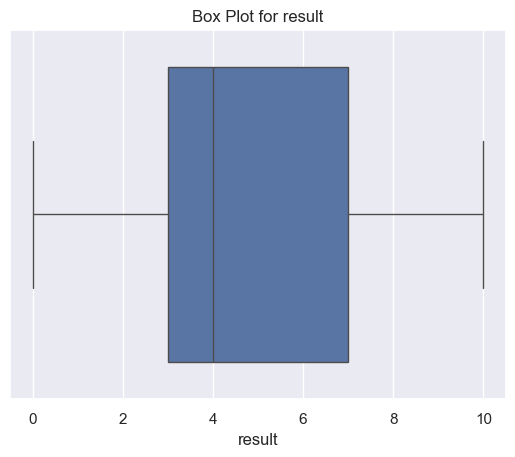

In [106]:
# box plot
sns.boxplot(x=df["result"])
plt.title("Box Plot for result")
plt.xlabel("result")
plt.show()

In [107]:
# count the outliers using IQR method
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]

In [108]:
len(age_outliers)

8

In [109]:
# count the outliers using IQR method
Q1 = df["result"].quantile(0.25)
Q3 = df["result"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
result_outliers = df[(df["result"] < lower_bound) | (df["result"] > upper_bound)]

In [110]:
len(result_outliers)

0

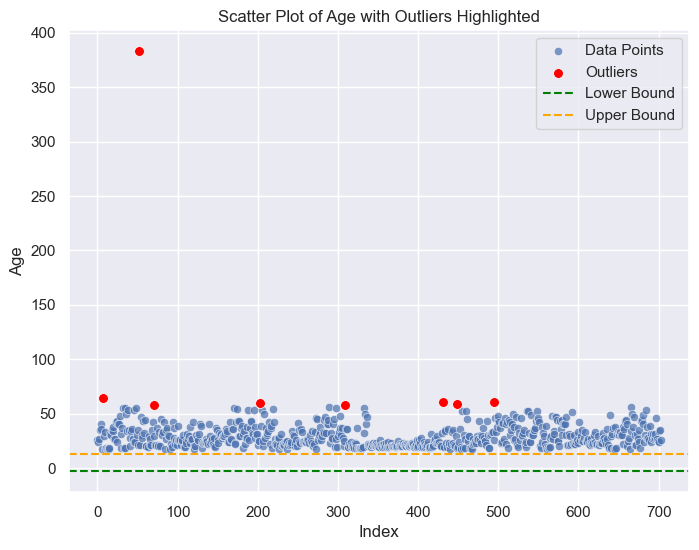

In [111]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.index, y=df["age"], label="Data Points", alpha=0.7)

# Highlight the outliers in red
sns.scatterplot(x=age_outliers.index, y=age_outliers["age"], color="red", label="Outliers", s=50)

plt.axhline(lower_bound, color="green", linestyle="--", label="Lower Bound")
plt.axhline(upper_bound, color="orange", linestyle="--", label="Upper Bound")

plt.xlabel("Index")
plt.ylabel("Age")
plt.title("Scatter Plot of Age with Outliers Highlighted")
plt.legend()
plt.show()

Univariate analysis of Categorical columns

In [112]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [113]:
df.rename(columns={"contry_of_res": "country_of_res", "austim": "autism" , "jundice" :"jaundice"}, inplace=True)

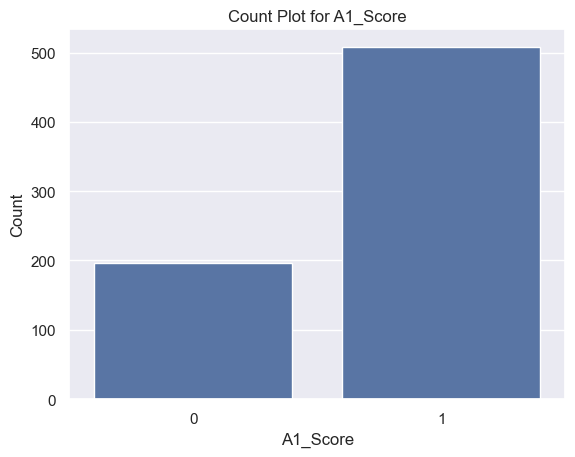

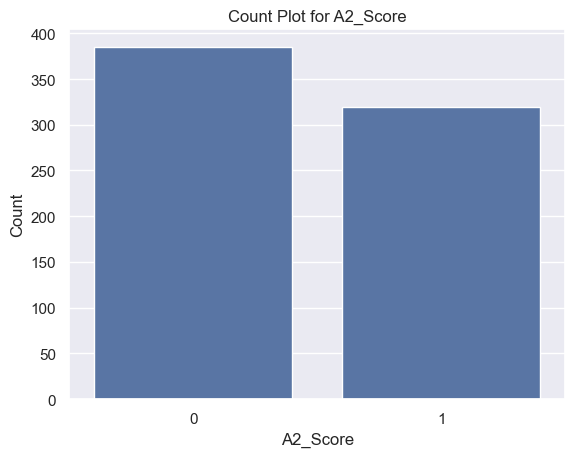

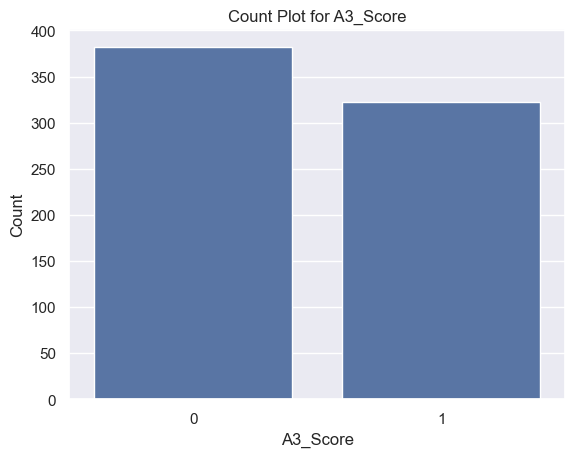

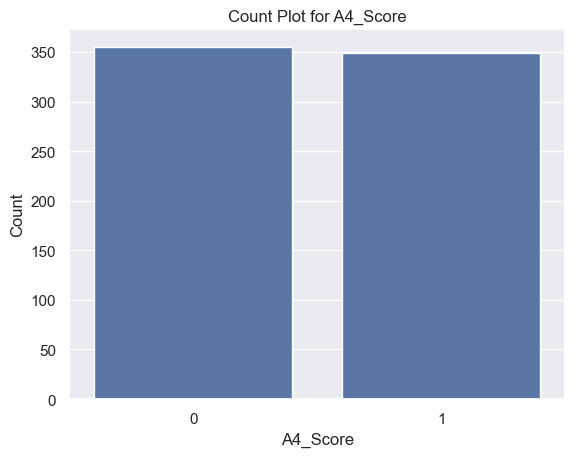

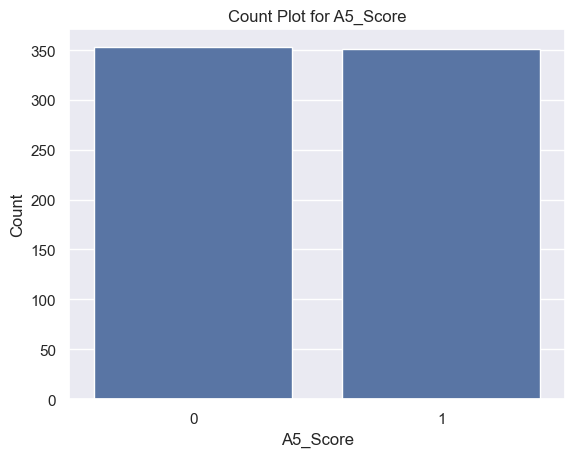

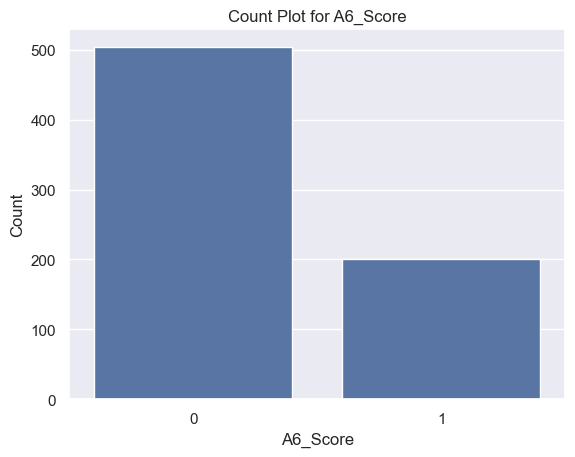

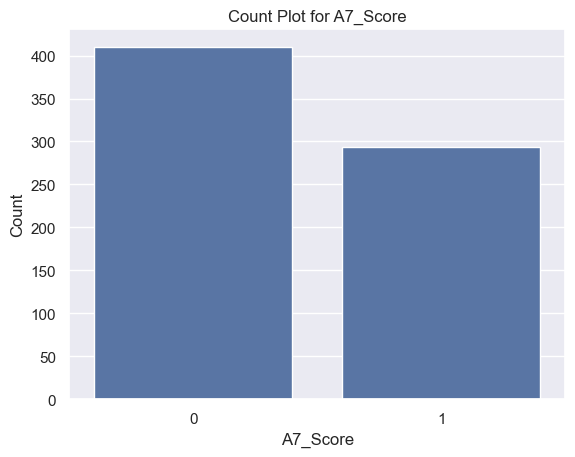

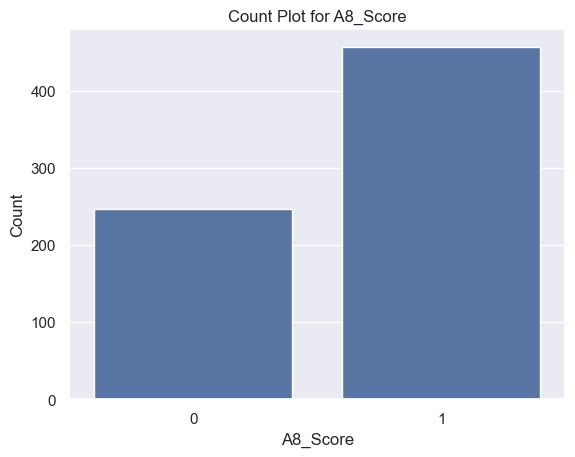

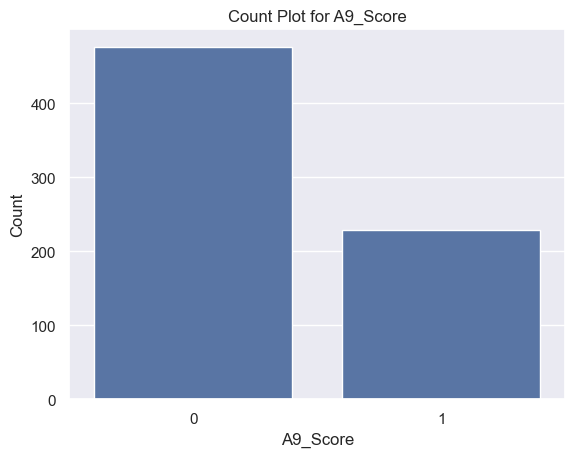

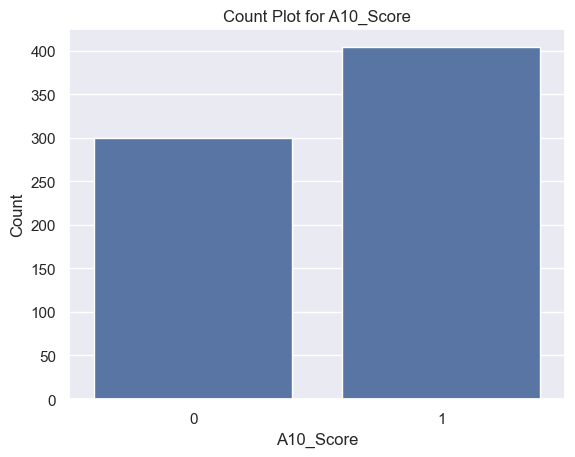

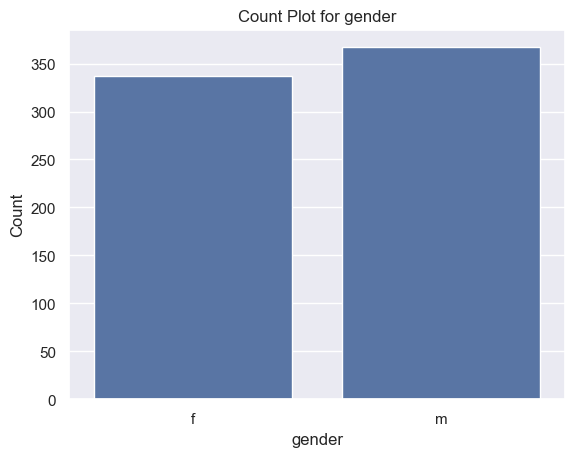

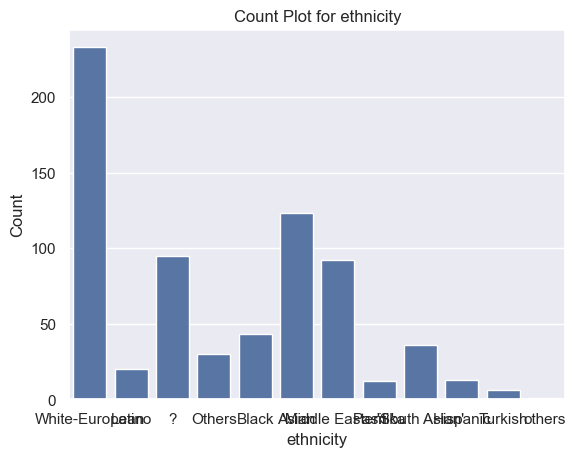

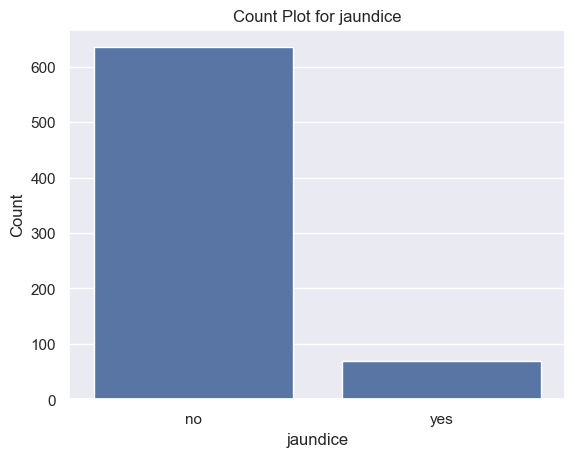

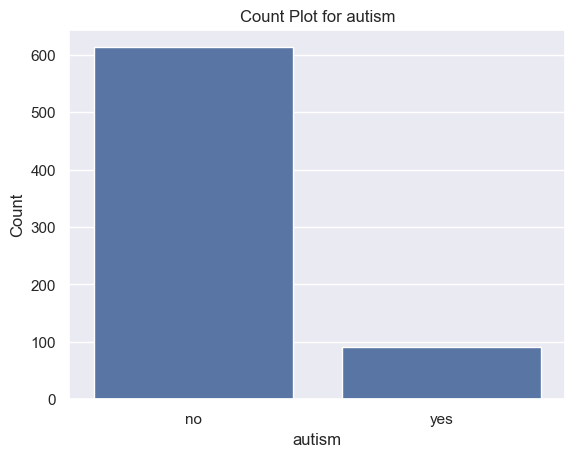

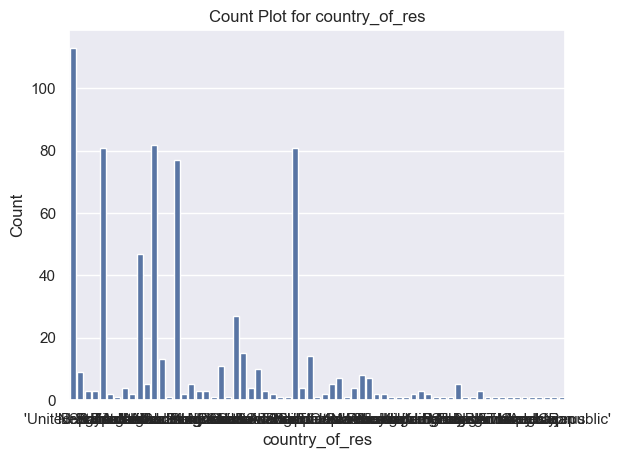

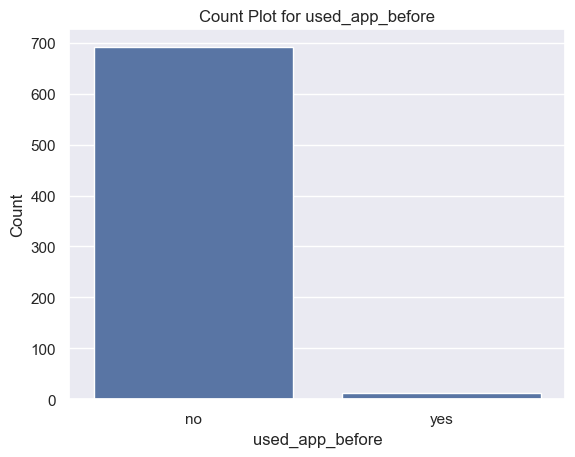

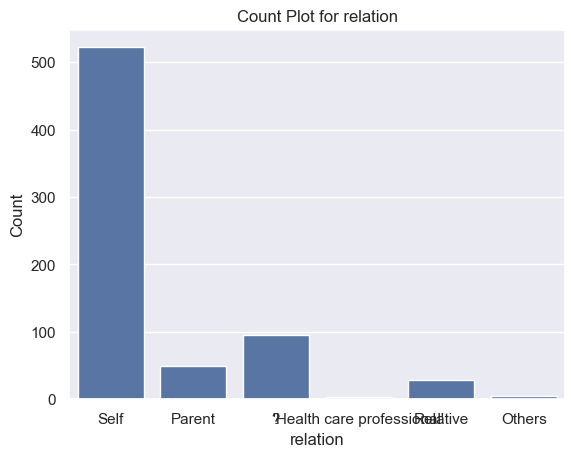

In [114]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'autism', 'country_of_res', 'used_app_before',
       'relation']

for col in categorical_columns:
  sns.countplot(x=df[col])
  plt.title(f"Count Plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

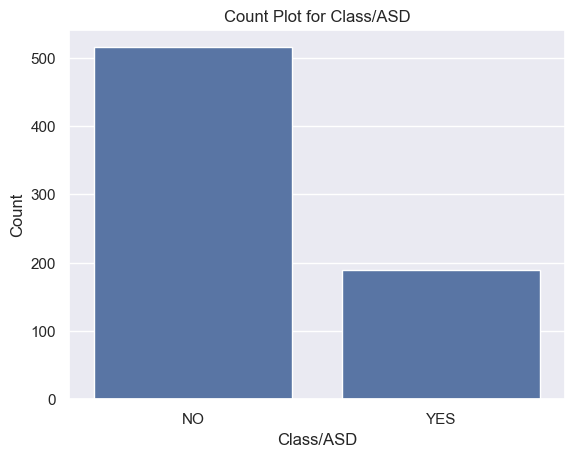

In [115]:
# countplot for target column (Class/ASD)
sns.countplot(x=df["Class/ASD"])
plt.title("Count Plot for Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

In [116]:
df["Class/ASD"].value_counts()

Class/ASD
NO     515
YES    189
Name: count, dtype: int64

handle missing values in ethnicity and relation column

In [117]:
df["ethnicity"] = df["ethnicity"].replace({"?": "Others", "others": "Others"})

In [118]:
df["ethnicity"].unique()

array(['White-European', 'Latino', 'Others', 'Black', 'Asian',
       "'Middle Eastern '", 'Pasifika', "'South Asian'", 'Hispanic',
       'Turkish'], dtype=object)

In [119]:
df["relation"].unique()

array(['Self', 'Parent', '?', "'Health care professional'", 'Relative',
       'Others'], dtype=object)

In [120]:
df["relation"] = df["relation"].replace(
    {"?": "Others",
     "Relative": "Others",
     "Parent": "Others",
     "Health care professional": "Others"}
)

In [121]:
df["relation"].unique()

array(['Self', 'Others', "'Health care professional'"], dtype=object)

In [122]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,'United States',no,6,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,Others,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,'United States',no,6,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,Others,no,no,Egypt,no,2,Others,NO


**Label Encoding**

In [123]:
# identify columns with "object" data type
object_columns = df.select_dtypes(include=["object"]).columns

In [124]:
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'autism', 'country_of_res',
       'used_app_before', 'relation', 'Class/ASD'],
      dtype='object')


In [125]:
# initialize a dictionary to store the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder   # saving the encoder for this column


# save the encoders as a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)

In [126]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'autism': LabelEncoder(),
 'country_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder(),
 'Class/ASD': LabelEncoder()}

In [127]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,0,9,0,0,10,0,6,2,0
1,1,1,0,1,0,0,0,1,0,1,24,1,5,0,1,24,0,5,2,0
2,1,1,0,1,1,0,1,1,1,1,27,1,5,1,1,60,0,8,1,1
3,1,1,0,1,0,0,1,1,0,1,35,0,9,0,1,10,0,6,2,0
4,1,0,0,0,0,0,0,1,0,0,40,0,6,0,0,31,0,2,1,0


Bivariate Analysis

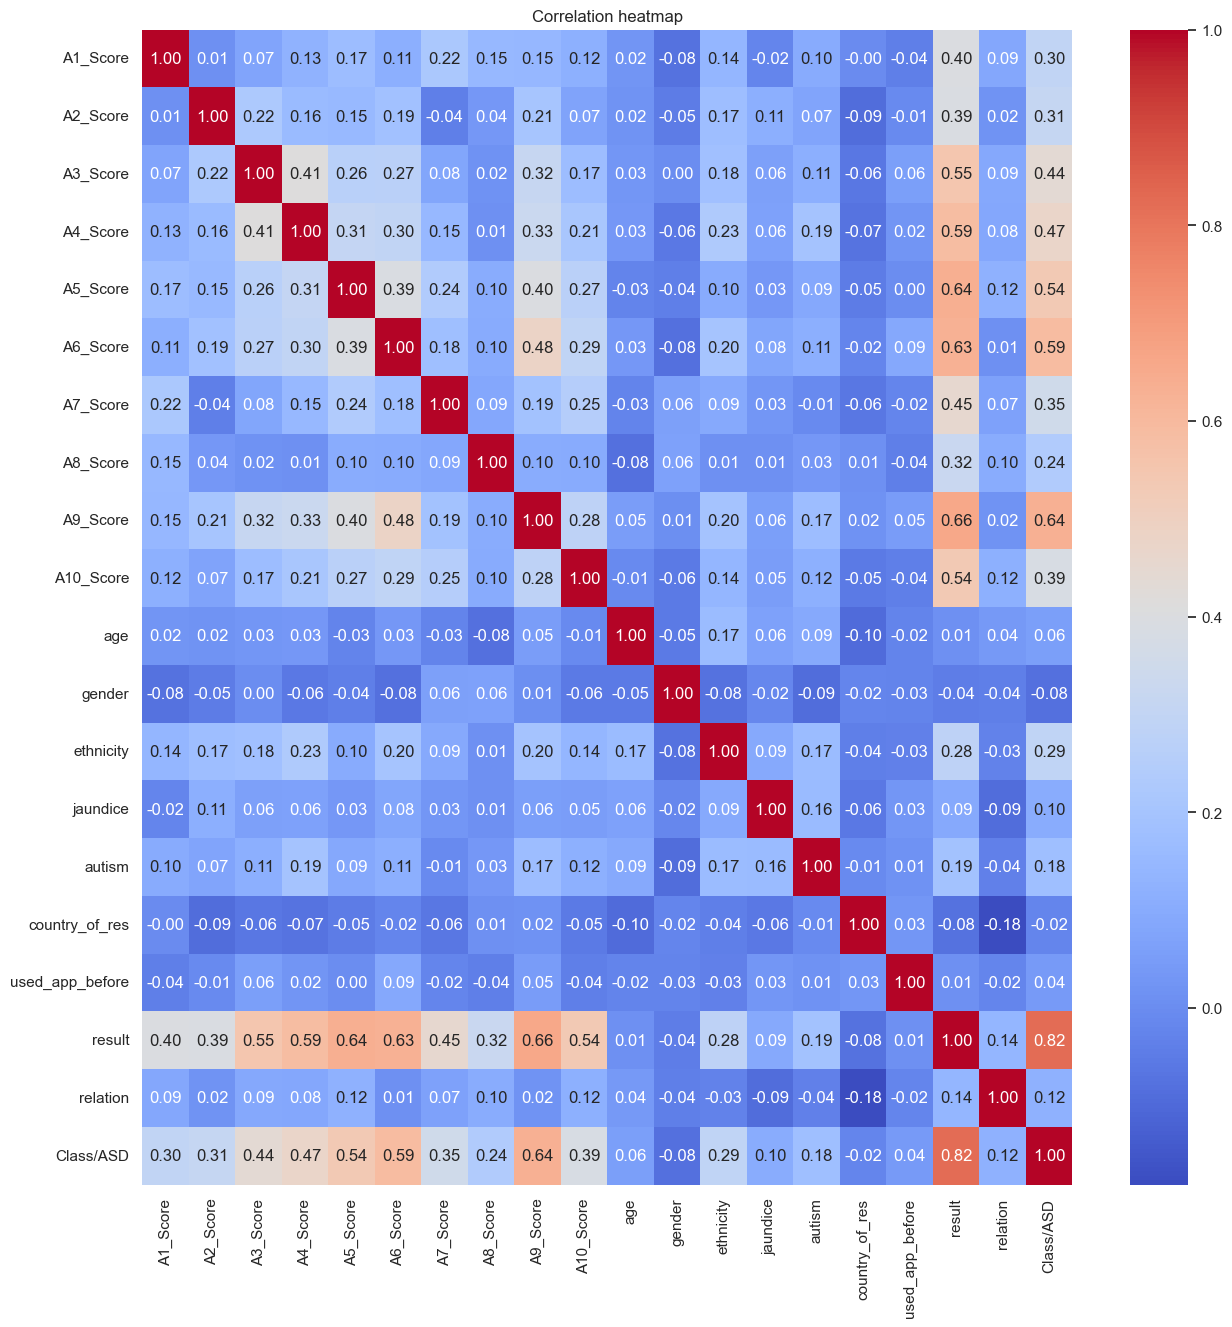

In [128]:
# correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

**Insights from EDA:**

- There are few outliers in the numerical columns (age, results)
- There is a class imbalance in the target column
- There is a class imbalance in the categorical features
- We don't have any highly correlated column
- performed label encoding and saved the encoders

**4. Data preprocessing**

Handling the outliers

This detects and replaces outliers with the median, making the dataset more robust for machine learning models. 

In [129]:
# function to replace the outliers with median
def replace_outliers_with_median(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  median = df[column].median()

  # replace outliers with median value
  df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

  return df

In [130]:
# replace outliers in the "age" column
df = replace_outliers_with_median(df, "age")

# replace outliers in the "result" column
df = replace_outliers_with_median(df, "result")

In [131]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,0,9,0,0,10,0,6,2,0
1,1,1,0,1,0,0,0,1,0,1,24.0,1,5,0,1,24,0,5,2,0
2,1,1,0,1,1,0,1,1,1,1,27.0,1,5,1,1,60,0,8,1,1
3,1,1,0,1,0,0,1,1,0,1,35.0,0,9,0,1,10,0,6,2,0
4,1,0,0,0,0,0,0,1,0,0,40.0,0,6,0,0,31,0,2,1,0


In [132]:
df.shape

(704, 20)

**Train Test Split**

In [133]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'autism', 'country_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [134]:
X = df.drop(columns=["Class/ASD"])
y = df["Class/ASD"]

In [135]:
X = X.drop(columns=["result"], errors="ignore")


In [136]:
print(X)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         1         1         1         0         0         1   
1           1         1         0         1         0         0         0   
2           1         1         0         1         1         0         1   
3           1         1         0         1         0         0         1   
4           1         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
699         0         1         0         1         1         0         1   
700         1         0         0         0         0         0         0   
701         1         0         1         1         1         0         1   
702         1         0         0         1         1         0         1   
703         1         0         1         1         1         0         1   

     A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  auti

In [137]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
699    1
700    0
701    1
702    0
703    1
Name: Class/ASD, Length: 704, dtype: int32


In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [139]:
print(y_train.shape)
print(y_test.shape)

(563,)
(141,)


In [140]:
y_train.value_counts()

Class/ASD
0    412
1    151
Name: count, dtype: int64

In [141]:
y_test.value_counts()

Class/ASD
0    103
1     38
Name: count, dtype: int64

In [142]:
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")
print("Train class distribution:\n", y_train.value_counts(normalize=True))
print("Test class distribution:\n", y_test.value_counts(normalize=True))


Train size: (563, 18), Test size: (141, 18)
Train class distribution:
 Class/ASD
0    0.731794
1    0.268206
Name: proportion, dtype: float64
Test class distribution:
 Class/ASD
0    0.730496
1    0.269504
Name: proportion, dtype: float64


**SMOTE (Synthetic Minority Oversampling technique)**

In [143]:
smote = SMOTE(random_state=42)

In [144]:
X_train = X_train.fillna(X_train.mean())  # Replace with mean


In [145]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [146]:
print(y_train_smote.shape)

(824,)


In [147]:
print(y_train_smote.value_counts())

Class/ASD
0    412
1    412
Name: count, dtype: int64


**5. Model Training**

In [148]:
# dictionary of classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [149]:
# dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters...")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores):.2f}")
  print("-"*50)

Training Decision Tree with default parameters...
Decision Tree Cross-Validation Accuracy: 0.91
--------------------------------------------------
Training Random Forest with default parameters...
Random Forest Cross-Validation Accuracy: 0.94
--------------------------------------------------
Training XGBoost with default parameters...
XGBoost Cross-Validation Accuracy: 0.94
--------------------------------------------------


In [150]:
cv_scores

{'Decision Tree': array([0.91515152, 0.8969697 , 0.93939394, 0.90909091, 0.90243902]),
 'Random Forest': array([0.95151515, 0.92121212, 0.95151515, 0.92727273, 0.92682927]),
 'XGBoost': array([0.93939394, 0.93333333, 0.96363636, 0.92121212, 0.92682927])}

**6. Model Selection & Hyperparameter Tuning**

In [151]:
# Initializing models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost_classifier = XGBClassifier(random_state=42)

In [152]:
# Hyperparameter grids for RandomizedSearchCV

param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30, 50, 70],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


param_grid_rf = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}


param_grid_xgb = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "subsample": [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0]
}


In [153]:
# perform RandomizedSearchCV for each model
random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid_dt, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgboost_classifier, param_distributions=param_grid_xgb, n_iter=20, cv=5, scoring="accuracy", random_state=42)


In [154]:
# fit the models
random_search_dt.fit(X_train_smote, y_train_smote)
random_search_rf.fit(X_train_smote, y_train_smote)
random_search_xgb.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [155]:
best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
  best_model = random_search_dt.best_estimator_
  best_score = random_search_dt.best_score_

if random_search_rf.best_score_ > best_score:
  best_model = random_search_rf.best_estimator_
  best_score = random_search_rf.best_score_

if random_search_xgb.best_score_ > best_score:
  best_model = random_search_xgb.best_estimator_
  best_score = random_search_xgb.best_score_



In [156]:
print(f"Best Model: {best_model}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

Best Model: RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=50,
                       random_state=42)
Best Cross-Validation Accuracy: 0.95


In [157]:
# save the best model
with open("best_model.pkl", "wb") as f:
  pickle.dump(best_model, f)

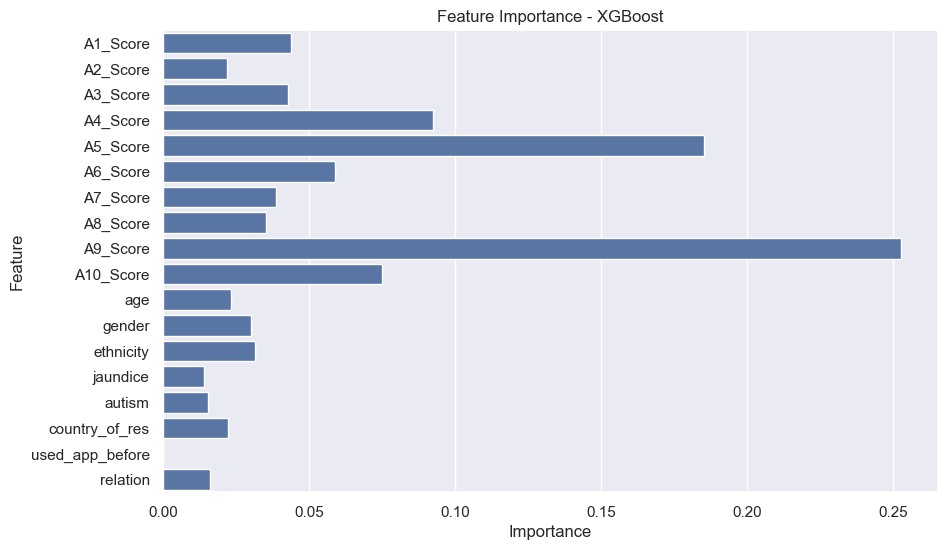

In [160]:
# Ensure the model is fitted
xgboost_classifier = random_search_xgb.best_estimator_

# Now access feature importances
feature_importances = xgboost_classifier.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importances})

# Plot feature importances
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"])
plt.title("Feature Importance - XGBoost")
plt.show()


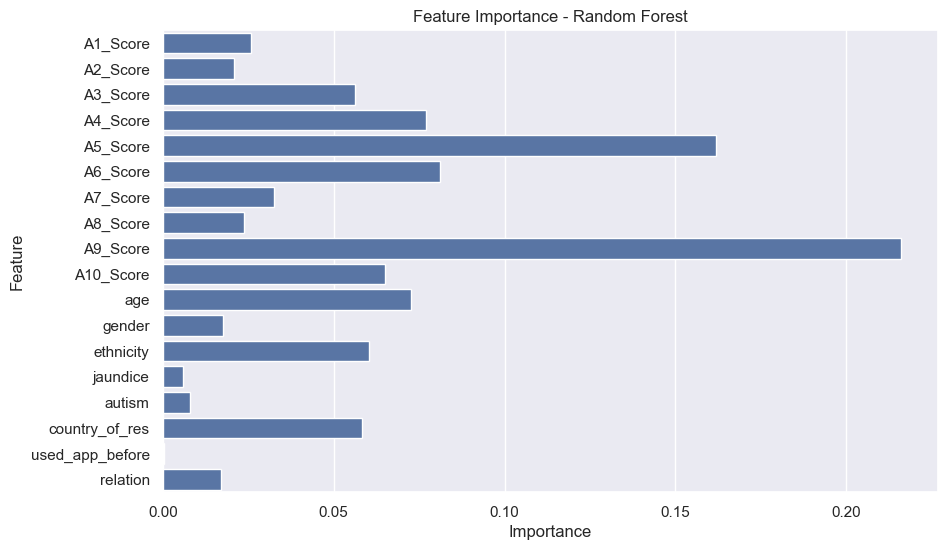

In [161]:
# Ensure the model is fitted
rf_classifier = random_search_rf.best_estimator_

# Get feature importances
feature_importances_rf = rf_classifier.feature_importances_
importance_df_rf = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importances_rf})

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df_rf["Importance"], y=importance_df_rf["Feature"])
plt.title("Feature Importance - Random Forest")
plt.show()


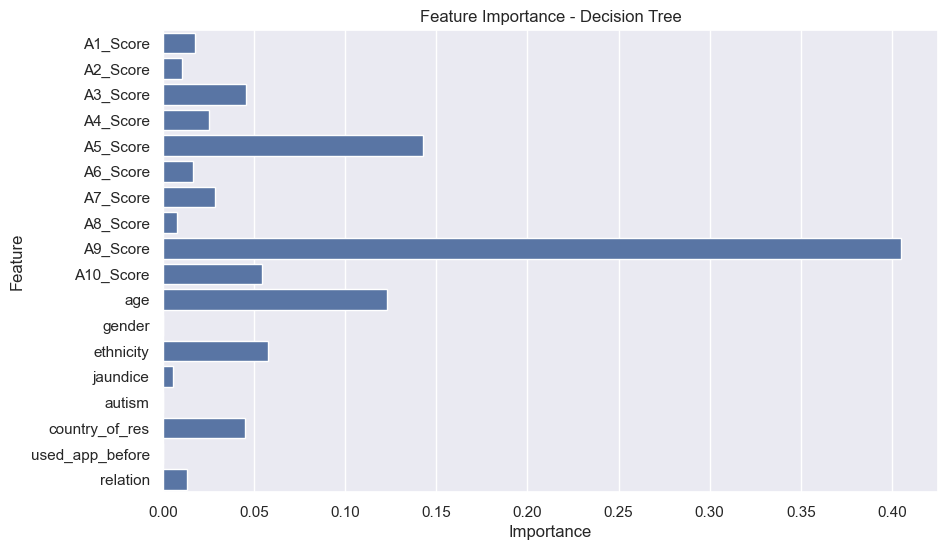

In [162]:
# Ensure the model is fitted
dt_classifier = random_search_dt.best_estimator_

# Get feature importances
feature_importances_dt = dt_classifier.feature_importances_
importance_df_dt = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importances_dt})

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df_dt["Importance"], y=importance_df_dt["Feature"])
plt.title("Feature Importance - Decision Tree")
plt.show()


**7. Evaluation**

[0]	validation_0-logloss:0.62369	validation_1-logloss:0.63839
[1]	validation_0-logloss:0.56542	validation_1-logloss:0.59301
[2]	validation_0-logloss:0.51605	validation_1-logloss:0.55368
[3]	validation_0-logloss:0.47359	validation_1-logloss:0.52027
[4]	validation_0-logloss:0.43714	validation_1-logloss:0.49095
[5]	validation_0-logloss:0.40499	validation_1-logloss:0.46666
[6]	validation_0-logloss:0.37664	validation_1-logloss:0.44714
[7]	validation_0-logloss:0.35063	validation_1-logloss:0.42604
[8]	validation_0-logloss:0.32789	validation_1-logloss:0.40830
[9]	validation_0-logloss:0.30744	validation_1-logloss:0.39507
[10]	validation_0-logloss:0.28888	validation_1-logloss:0.38440
[11]	validation_0-logloss:0.27237	validation_1-logloss:0.37189
[12]	validation_0-logloss:0.25725	validation_1-logloss:0.35971
[13]	validation_0-logloss:0.24376	validation_1-logloss:0.35400
[14]	validation_0-logloss:0.23123	validation_1-logloss:0.34353
[15]	validation_0-logloss:0.22033	validation_1-logloss:0.33531
[1

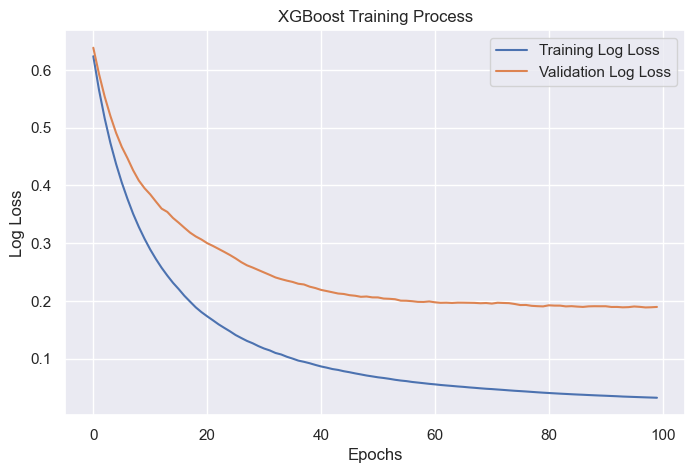

In [166]:
xgboost_classifier = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1
)

eval_set = [(X_train_smote, y_train_smote), (X_test, y_test)]
xgboost_classifier.fit(X_train_smote, y_train_smote, 
                       eval_set=eval_set, 
                       verbose=True)

# Fetch evaluation results
evals_result = xgboost_classifier.evals_result()

# Plot training loss
plt.figure(figsize=(8, 5))
plt.plot(evals_result['validation_0']['logloss'], label='Training Log Loss')
plt.plot(evals_result['validation_1']['logloss'], label='Validation Log Loss')
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.title("XGBoost Training Process")
plt.legend()
plt.show()


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


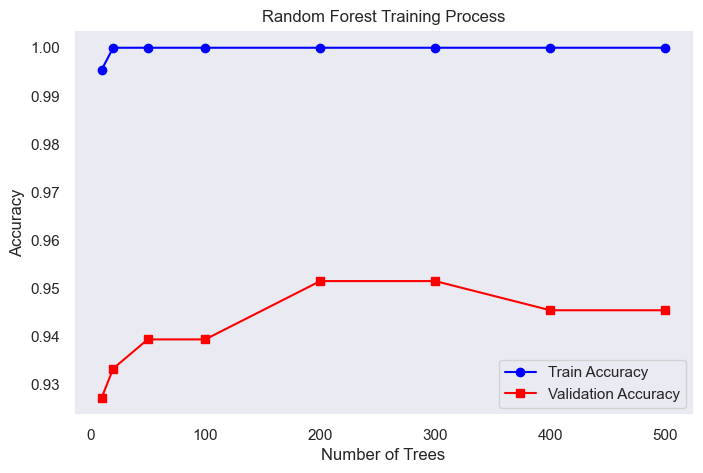

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data
X_train_rf, X_val_rf, y_train_rf, y_val_rf = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state=42)

# Initialize variables
n_estimators_range = [10, 20, 50, 100, 200, 300, 400, 500]  # Different tree counts
train_accuracies = []
val_accuracies = []

# Train models with different numbers of trees
for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42, oob_score=True, bootstrap=True)
    rf.fit(X_train_rf, y_train_rf)

    # Predict on training and validation sets
    train_preds = rf.predict(X_train_rf)
    val_preds = rf.predict(X_val_rf)

    # Compute accuracy
    train_acc = accuracy_score(y_train_rf, train_preds)
    val_acc = accuracy_score(y_val_rf, val_preds)

    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

# Plot the training process
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_range, train_accuracies, marker='o', label="Train Accuracy", color="blue")
plt.plot(n_estimators_range, val_accuracies, marker='s', label="Validation Accuracy", color="red")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.title("Random Forest Training Process")
plt.legend()
plt.grid()
plt.show()


In [168]:
# evaluate on test data
y_test_pred = best_model.predict(X_test)
print("Accuracy score:\n", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy score:
 0.9574468085106383
Confusion Matrix:
 [[100   3]
 [  3  35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       103
           1       0.92      0.92      0.92        38

    accuracy                           0.96       141
   macro avg       0.95      0.95      0.95       141
weighted avg       0.96      0.96      0.96       141

